### NOTE: When executing in binder, to prevent the kernel from dying, please replace the last line in cell 6 with
<m> ale_exp = ale.explain(X_train.reshape(X_train.shape[0],len(columns_names))[:25000]) </m> 
### cell 10 with 
<m> ale_plot(model11, trainx_df[:25000], [columns_names[0], columns_names[1]], bins=10, monte_carlo=True) </m>
### And cell 11 with
<m> ale_plot(model11, trainx_df[:25000], [columns_names[0], columns_names[3]], bins=10, monte_carlo=True) </m>

### This is only to check if the code executes or not and is not correct. In the above mentioned code, we only consider a subset of training data to prevent running out of memory in binder. But this is incorrect and we only do it to check if the code runs without any errors.

In [1]:
import sys
stdout = sys.stdout

import os
sys.path.insert(1, os.path.join(os.path.abspath(''), 'DSTT-model-and-utils'))
from DSTT_model import DSTTModel
from DSTT_utils import load_training_and_testing_data

sys.stdout = stdout

In [2]:
columns_names  =['Scalar_B',  'BZ_GSE', 'SW_Plasma_Temperature',  'SW_Proton_Density','SW_Plasma_Speed', 
                 'Flow_pressure', 'E_electric_field']

In [3]:
model11 = DSTTModel()

X_train,y_train, X_test, y_test, X_valid, y_valid,x_dates = load_training_and_testing_data(num_hours = 3)

In [4]:
import pandas as pd
trainx_df = pd.DataFrame(X_train.reshape(X_train.shape[0],len(columns_names)), columns = columns_names)

trainy_df = pd.DataFrame(y_train, columns = ['Dst-index'])

df = pd.concat([trainx_df, trainy_df], axis=1)

print(df.shape)

df = df[df.SW_Plasma_Temperature != 9999999]
df = df[df.Scalar_B != 999.9]
df = df[df.Flow_pressure != 99.99]
df = df[df.E_electric_field != 999.99]

print(df.shape)

trainy_df = pd.DataFrame(df[df.columns[-1]], columns = ['Dst-index'])

y_train = trainy_df.to_numpy()

trainx_df = df.drop('Dst-index', axis=1)

X_train = trainx_df.to_numpy()

X_train = X_train.reshape(X_train.shape[0],1, len(columns_names))

(104078, 8)
(102853, 8)


In [5]:
#model11.set_data(X_train,y_train, X_train,y_train)

input_shape = (X_train.shape[1], X_train.shape[2])

model11.load_model(input_shape, kl_weight=1/X_train.shape[0], num_hours=3, w_dir='models')

In [6]:
# Implementing ALE
from alibi.explainers import ALE, plot_ale
ale = ALE(model11.predict, feature_names=columns_names, target_names=['Dst index'])
# Explanation on the train set 
ale_exp = ale.explain(X_train.reshape(X_train.shape[0],len(columns_names)))

1/1 [==============================] - 3s 3s/step


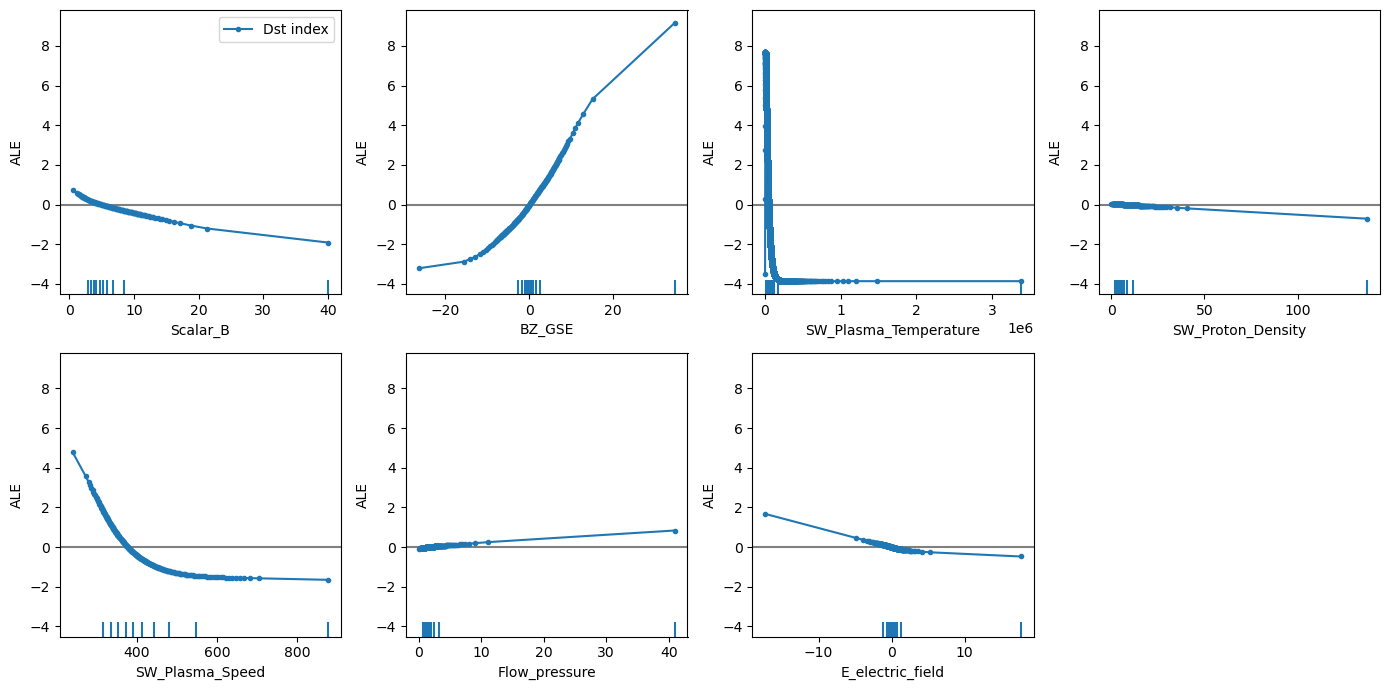

In [7]:
plot_ale(ale_exp, n_cols=4, fig_kw={'figwidth':14, 'figheight': 7});

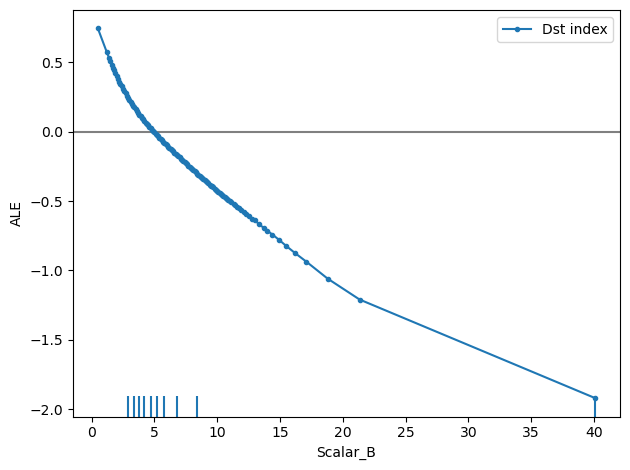

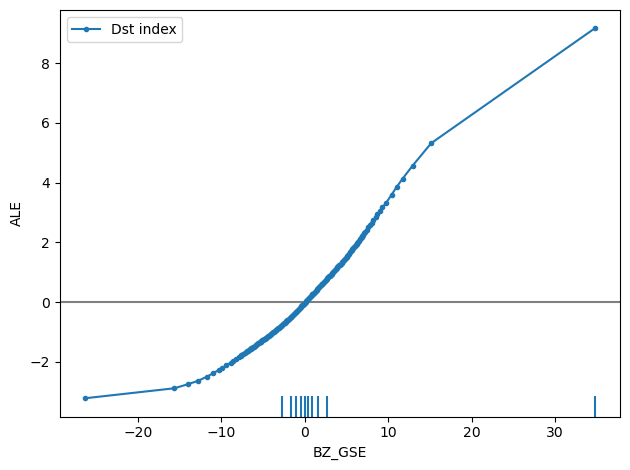

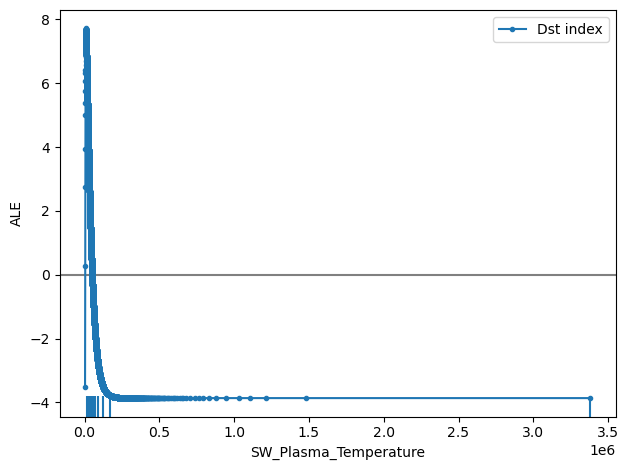

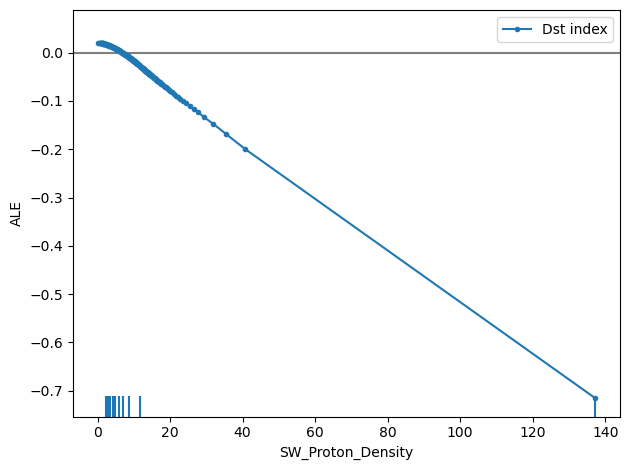

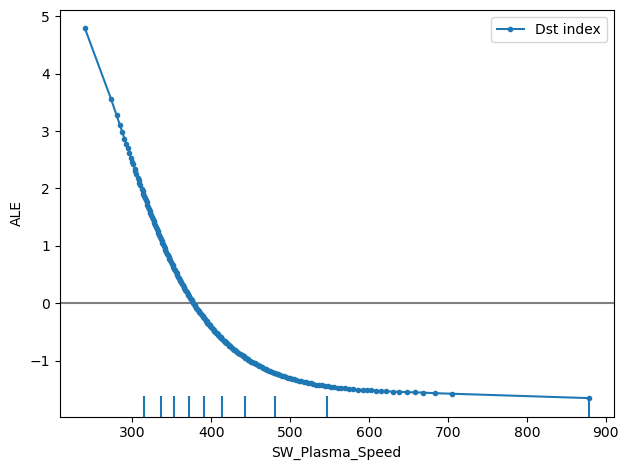

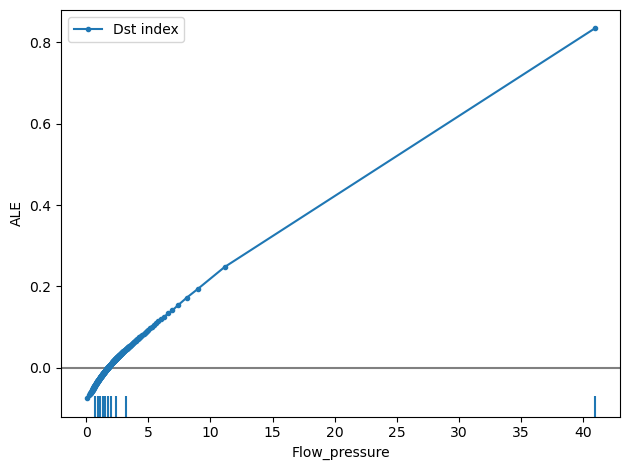

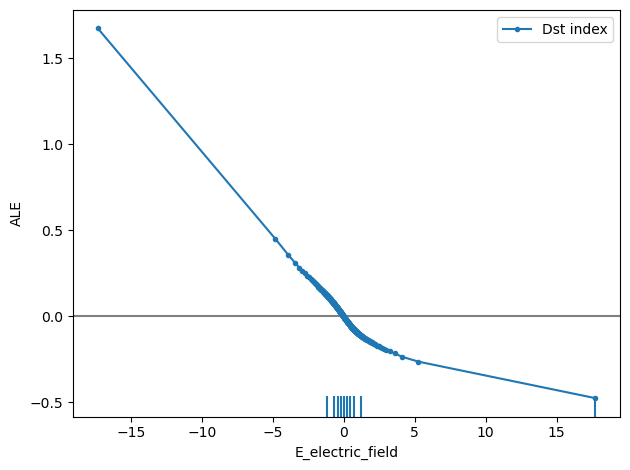

In [8]:
for k in range(7):
    plot_ale(ale_exp, features = [columns_names[k]]);

In [8]:
import matplotlib as mpl
from loguru import logger
from alepython import ale_plot

# for i in range(6):
#     for j in range(i+1,7):
#         ale_plot(model11, trainx_df, [columns_names[i], columns_names[j]], bins=10, monte_carlo=True)

1/1 [==============================] - 7s 7s/step


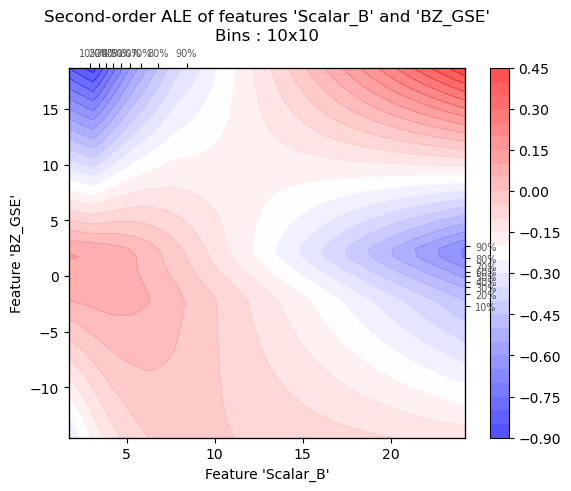

<AxesSubplot:title={'center':"Second-order ALE of features 'Scalar_B' and 'BZ_GSE'\nBins : 10x10"}, xlabel="Feature 'Scalar_B'", ylabel="Feature 'BZ_GSE'">

In [10]:
ale_plot(model11, trainx_df, [columns_names[0], columns_names[1]], bins=10, monte_carlo=True)

1/1 [==============================] - 9s 9s/step


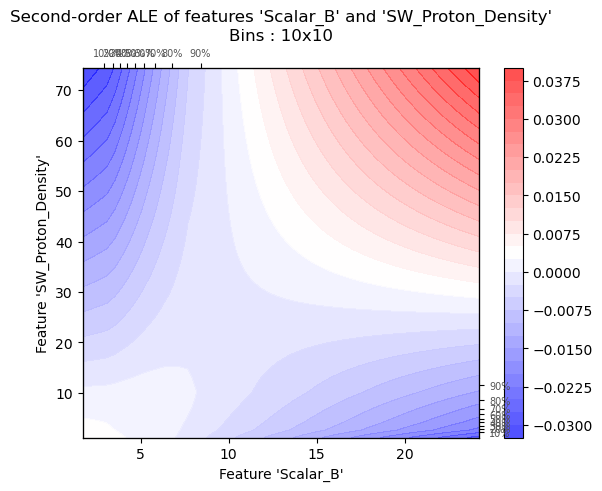

<AxesSubplot:title={'center':"Second-order ALE of features 'Scalar_B' and 'SW_Proton_Density'\nBins : 10x10"}, xlabel="Feature 'Scalar_B'", ylabel="Feature 'SW_Proton_Density'">

In [12]:
ale_plot(model11, trainx_df, [columns_names[0], columns_names[3]], bins=10, monte_carlo=True)